In [40]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df = pd.read_excel("donnees_immobilieres_extended.xlsx")

In [42]:
df.head()

,ID,Surface_m2,Chambres,Annee_construction,Distance_centre_km,Etage,Ascenseur,Annee_vente,Qualite_ecole,Revenu_median_quartier,Distance_universite,Prix_milliers_euros
0,1,139.87,3,1982,21.33,2,1,2023,1.1,47.5,11.9,1961.68
1,2,114.47,4,1991,2.90,5,1,2022,4.7,44.2,11.9,2303.67
2,3,145.91,2,2005,3.00,3,1,2017,3.2,53.8,10.7,2224.12
3,4,180.92,4,1995,29.61,3,1,2022,6.1,68.3,11.1,2425.63
4,5,110.63,3,2016,11.54,0,0,2021,9.0,81.9,10.8,2323.34


## 1 Statistiques Descriptives et Analyse Préliminaire

1.1 Statistiques descriptives

Calculez et présentez les statistiques descriptives pour chaque variable :
• Moyenne ( ¯X ), médiane, écart-type (sX)
• Minimum, maximum, quartiles
• Asymétrie (skewness) et aplatissement (kurtosis) pour le prix
• Présentez un tableau récapitulatif

In [43]:
#Statistiques Descriptives

def stat_descri(variable):
    statistiques =  {
        "moyenne" : variable.mean(),
        "mediane" : variable.median(),
        "ecart_type" : variable.std(),
        "minimum" : variable.min(),
        "Q1" : variable.quantile(0.25),
        "Q2 (mediane)" : variable.quantile(0.50),
        "Q3" : variable.quantile(0.75),
        "maximum" : variable.max(),
        "Asymetrie (skewness)" : skew(variable),
        "Applatissement (kurtosis)" : kurtosis(variable)
    }

    return pd.Series(statistiques)

for c in df.columns :
    stat_variable = stat_descri(df[c])
    print(f"\nStatistiques pour {c} :")
    print(stat_variable)


Statistiques pour ID :
moyenne                       75.500000
mediane                       75.500000
ecart_type                    43.445368
minimum                        1.000000
Q1                            38.250000
Q2 (mediane)                  75.500000
Q3                           112.750000
maximum                      150.000000
Asymetrie (skewness)           0.000000
Applatissement (kurtosis)     -1.200107
dtype: float64

Statistiques pour Surface_m2 :
moyenne                      116.706800
mediane                      117.845000
ecart_type                    37.693819
minimum                       15.210000
Q1                            93.240000
Q2 (mediane)                 117.845000
Q3                           139.637500
maximum                      218.530000
Asymetrie (skewness)           0.047238
Applatissement (kurtosis)     -0.142272
dtype: float64

Statistiques pour Chambres :
moyenne                      2.886667
mediane                      3.000000
ecart_ty

In [44]:
#Tableau Recapitulatif

df_tableau = df.apply(stat_descri)
df_tableau

,ID,Surface_m2,Chambres,Annee_construction,Distance_centre_km,Etage,Ascenseur,Annee_vente,Qualite_ecole,Revenu_median_quartier,Distance_universite,Prix_milliers_euros
moyenne,75.500000,116.706800,2.886667,2001.826667,16.500267,2.580000,0.460000,2019.840000,5.468667,63.668000,8.064000,2107.904800
mediane,75.500000,117.845000,3.000000,2002.500000,16.865000,2.500000,0.000000,2020.000000,5.600000,63.450000,8.300000,2105.050000
ecart_type,43.445368,37.693819,1.077760,11.704841,9.017430,1.761901,0.500067,2.288225,1.868249,9.295458,3.746502,229.921013
minimum,1.000000,15.210000,1.000000,1980.000000,0.830000,0.000000,0.000000,2015.000000,1.000000,42.900000,1.000000,1500.770000
Q1,38.250000,93.240000,2.000000,1991.000000,9.105000,1.000000,0.000000,2018.000000,4.125000,57.500000,5.300000,1934.285000
Q2 (mediane),75.500000,117.845000,3.000000,2002.500000,16.865000,2.500000,0.000000,2020.000000,5.600000,63.450000,8.300000,2105.050000
Q3,112.750000,139.637500,4.000000,2012.000000,24.697500,4.000000,1.000000,2022.000000,7.000000,70.475000,10.875000,2272.780000
maximum,150.000000,218.530000,5.000000,2022.000000,29.990000,5.000000,1.000000,2023.000000,10.000000,83.900000,17.100000,2743.040000
Asymetrie (skewness),0.000000,0.047238,0.097162,-0.082087,-0.140519,-0.011187,0.160514,-0.318628,-0.143595,0.051393,-0.115250,0.154664
Applatissement (kurtosis),-1.200107,-0.142272,-0.707385,-1.166922,-1.192379,-1.331673,-1.974235,-1.012342,-0.519511,-0.600971,-0.648344,-0.492978


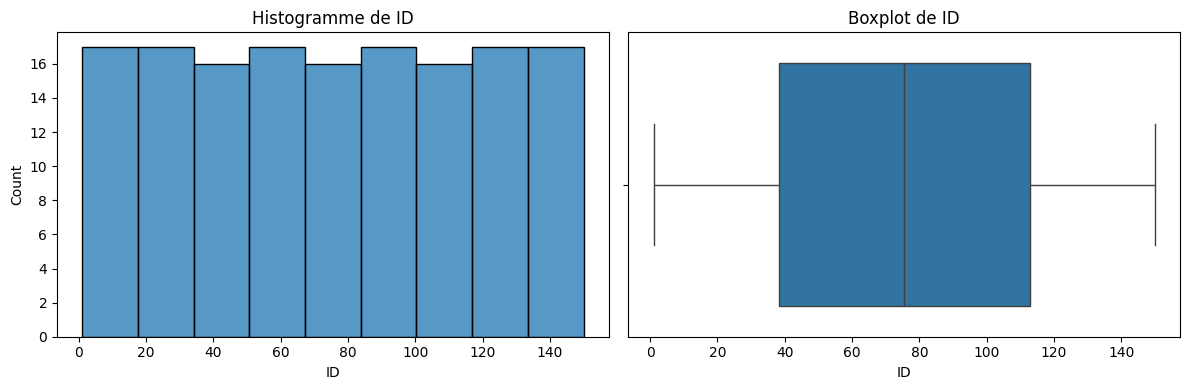

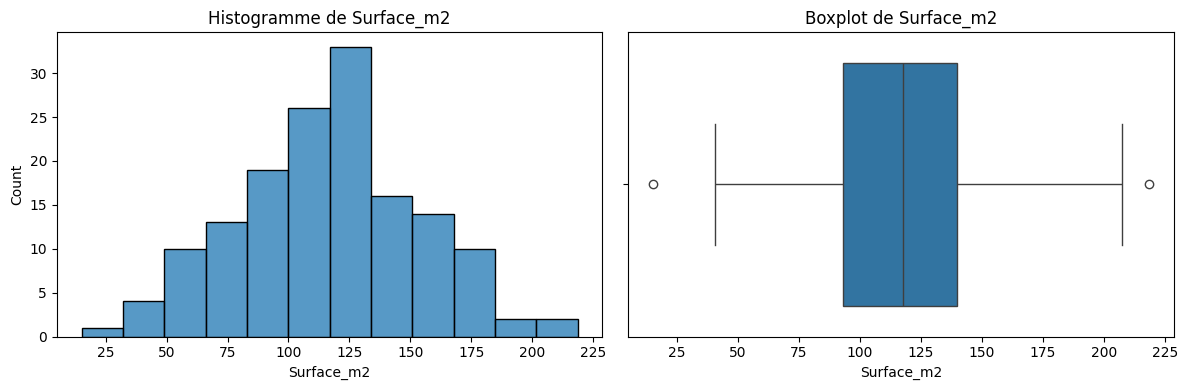

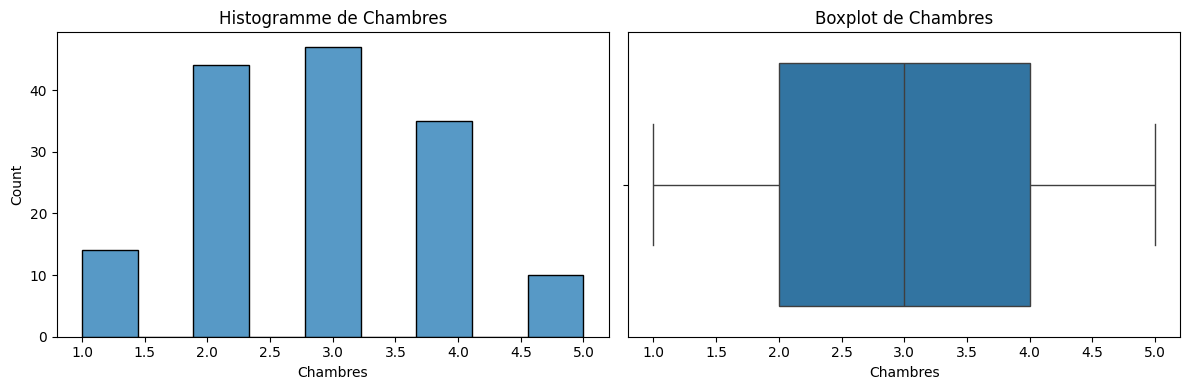

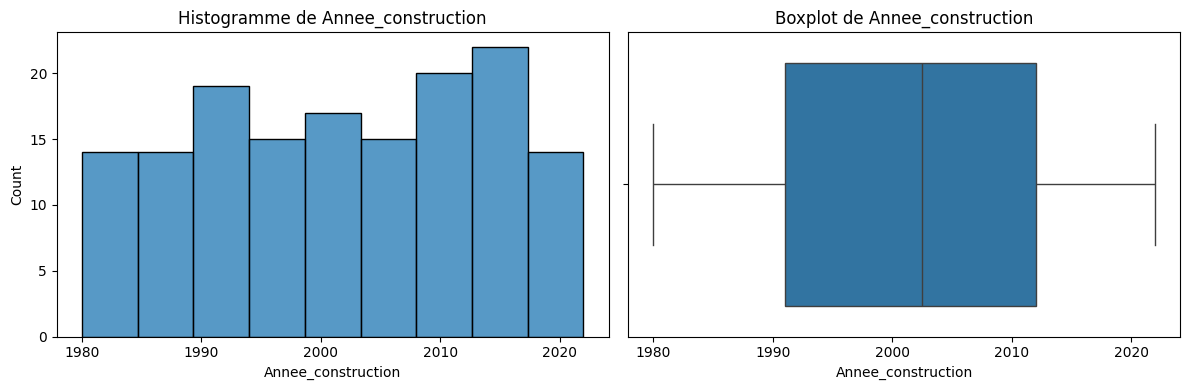

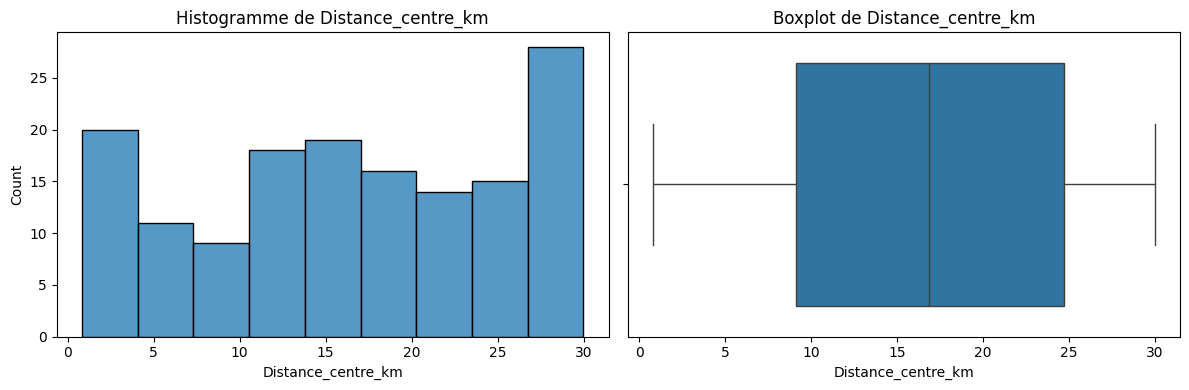

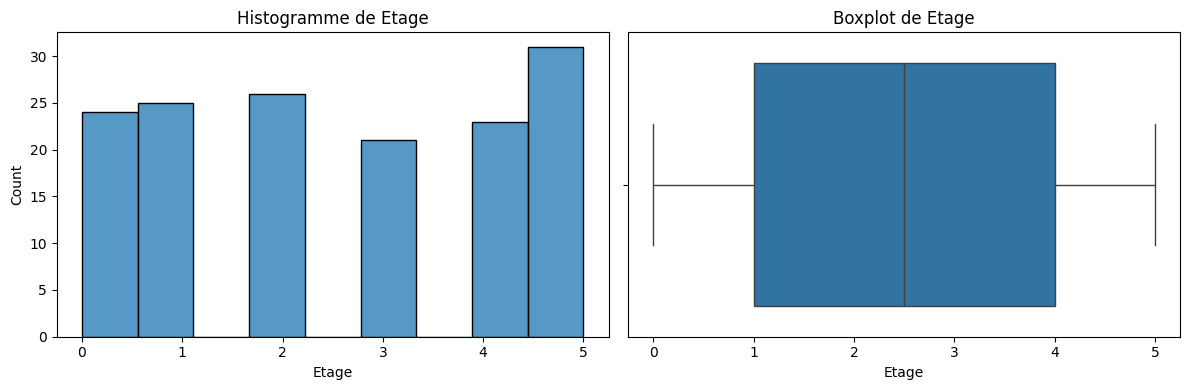

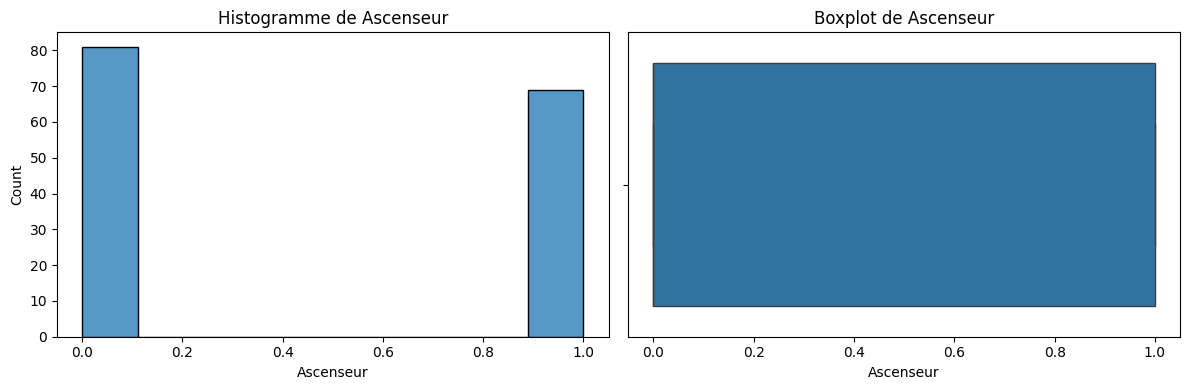

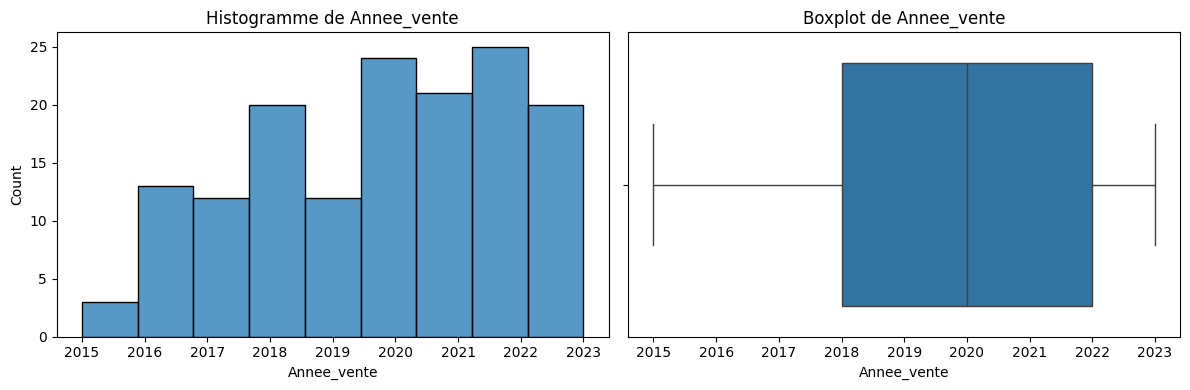

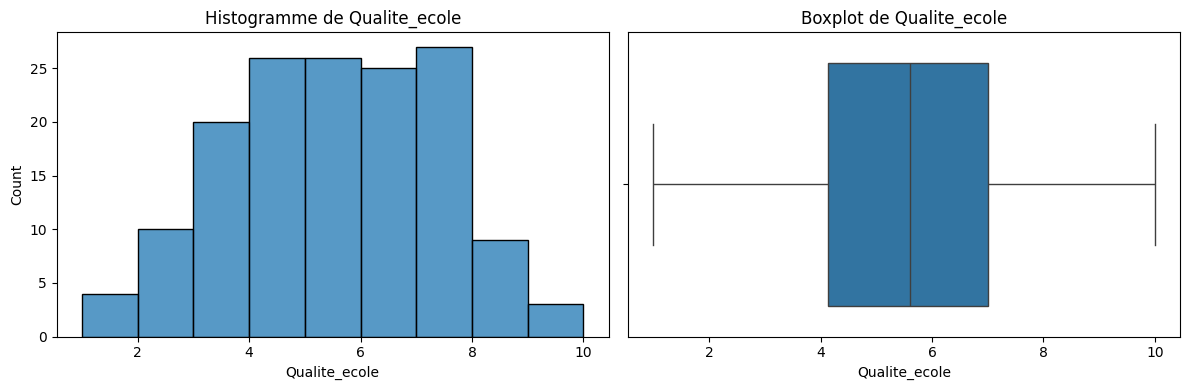

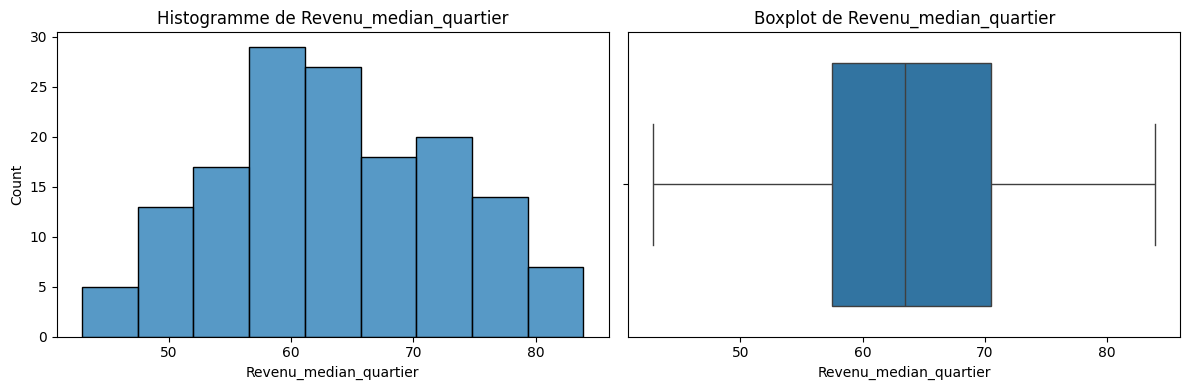

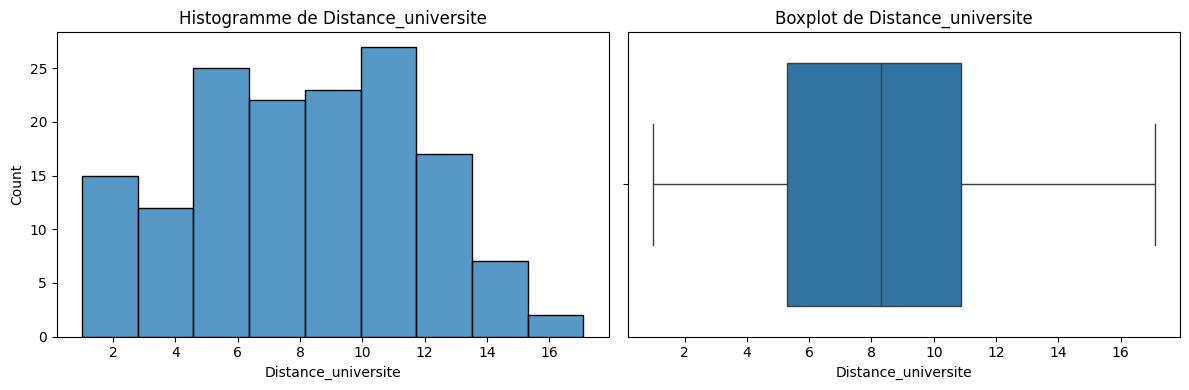

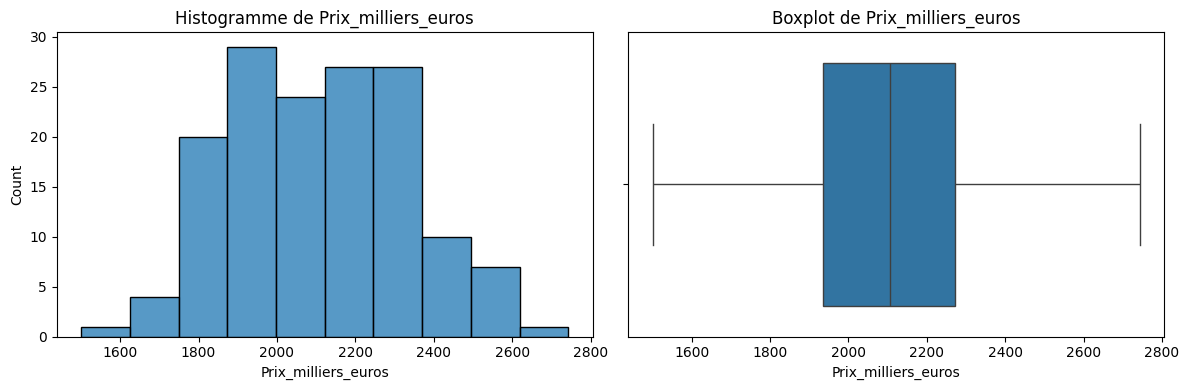

In [45]:
#Histogrammes & Boites a Moustaches

def graphiques_stat (variable) :

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=df, x=df[variable], ax = axes[0])
    axes[0].set_title(f"Histogramme de {variable}")
    axes[0].set_xlabel(f"{variable}")

    sns.boxplot(data=df,x=df[variable], ax = axes[1]) 
    axes[1].set_title(f"Boxplot de {variable}")
    axes[1].set_xlabel(f"{variable}")

    plt.tight_layout()
    plt.show()

for c in df.columns :
    graphiques_stat(c)



L’analyse des histogrammes et des boîtes à moustaches montre que la variable Prix_milliers_euros présente une asymétrie positive marquée, avec une distribution étirée vers les valeurs élevées. Une transformation logarithmique apparaît ainsi pertinente afin de réduire l’asymétrie et de stabiliser la variance.
La variable Surface_m2 présente également une légère asymétrie à droite ; une transformation logarithmique pourrait être envisagée, bien que celle-ci soit moins nécessaire.

1.2 Analyse de correlation

• Calculez la matrice de corrélation entre toutes les variables continues
• Créez un graphique de corrélation (heatmap)
• Identifiez les paires de variables fortement corrélées entre elles (risque de multicolinéarité)

Question

Quelle variable semble avoir l’impact le plus fort sur le prix selon la corrélation ? Attention :
corrélation ̸= causalité !


In [46]:
df_continue = df.select_dtypes(include = 'number')
df_continue = df_continue.drop(columns=["ID", "Chambres", "Annee_construction", "Etage", "Ascenseur", "Annee_vente"])
df_continue

,Surface_m2,Distance_centre_km,Qualite_ecole,Revenu_median_quartier,Distance_universite,Prix_milliers_euros
0,139.87,21.33,1.1,47.5,11.9,1961.68
1,114.47,2.90,4.7,44.2,11.9,2303.67
2,145.91,3.00,3.2,53.8,10.7,2224.12
3,180.92,29.61,6.1,68.3,11.1,2425.63
4,110.63,11.54,9.0,81.9,10.8,2323.34
...,...,...,...,...,...,...
145,151.27,10.20,4.6,51.3,6.7,2140.32
146,70.52,19.19,4.1,42.9,3.7,1680.16
147,67.18,7.58,5.4,71.6,8.7,1902.30
148,140.88,2.74,5.0,54.4,9.5,2252.99


In [47]:
corr_matrix =df_continue.corr()
corr_matrix

,Surface_m2,Distance_centre_km,Qualite_ecole,Revenu_median_quartier,Distance_universite,Prix_milliers_euros
Surface_m2,1.000000,-0.074765,0.043832,0.013908,-0.088362,0.826731
Distance_centre_km,-0.074765,1.000000,0.042029,0.111579,-0.055751,-0.306648
Qualite_ecole,0.043832,0.042029,1.000000,0.598651,-0.444083,0.253632
Revenu_median_quartier,0.013908,0.111579,0.598651,1.000000,-0.304002,0.205779
Distance_universite,-0.088362,-0.055751,-0.444083,-0.304002,1.000000,-0.124521
Prix_milliers_euros,0.826731,-0.306648,0.253632,0.205779,-0.124521,1.000000


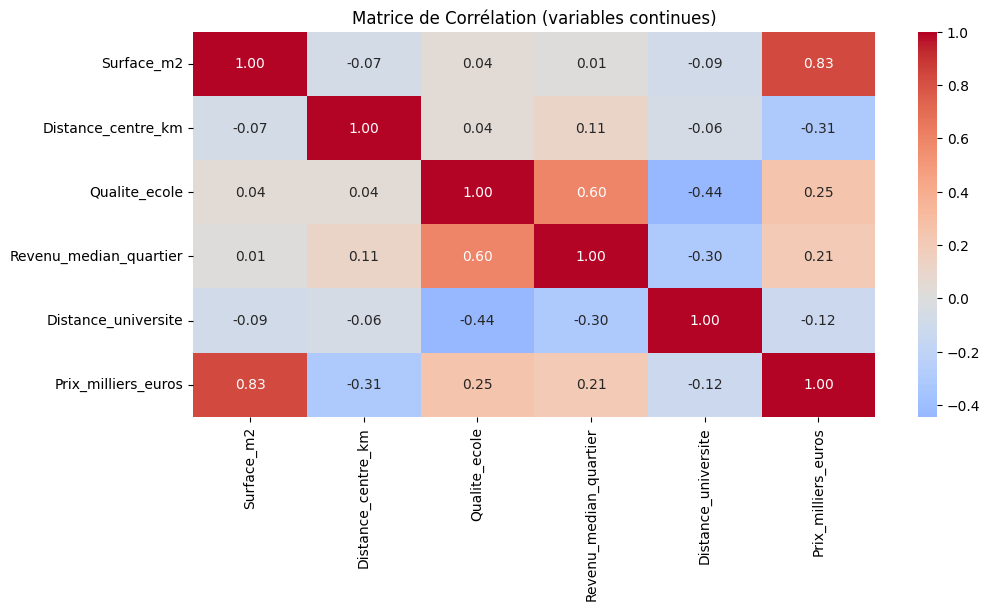

In [48]:
plt.figure(figsize=(11,5))

sns.heatmap(data = corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            center=0
            )

plt.title("Matrice de Corrélation (variables continues)")
plt.show()

L’analyse de la matrice de corrélation montre que la variable la plus fortement corrélée au prix (Prix_milliers_euros) est la surface du logement (Surface_m2), avec un coefficient de corrélation de **0.83**, indiquant une relation positive forte.

On observe également une corrélation modérée entre la qualité des écoles (Qualite_ecole) et le revenu médian du quartier (Revenu_median_quartier) : **0.60**, ce qui pourrait suggérer un risque limité de multicolinéarité si ces variables sont intégrées simultanément dans un modèle de régression.

Il convient toutefois de rappeler que la corrélation observée ne permet pas d’établir une relation de causalité.

---------------------------

## 2 Le Modèle Linéaire : Estimation et Interprétation
2.1 Modèle de régression linéaire simple

Prixi ​= β0 ​+ β1 ​× Surfacei ​+ ui​

On utilise les Moindres Carrés Ordinaires (MCO) pour estimer les coefficients β0 et β1.

In [55]:
import statsmodels.api as sm

In [56]:
# Variables dépendante et indépendante
X = df['Surface_m2']
y = df['Prix_milliers_euros']

# Ajouter la constante pour beta0
X = sm.add_constant(X)

# Estimation par MCO
model = sm.OLS(y, X).fit()

# Résumé complet
print(model.summary())

# Récupérer les valeurs spécifiques
beta0 = model.params['const']
beta1 = model.params['Surface_m2']
std_beta0 = model.bse['const']
std_beta1 = model.bse['Surface_m2']
t_beta0 = model.tvalues['const']
t_beta1 = model.tvalues['Surface_m2']
p_beta0 = model.pvalues['const']
p_beta1 = model.pvalues['Surface_m2']
r2 = model.rsquared
r2_adj = model.rsquared_adj

print(f"β0 = {beta0}, σβ0 = {std_beta0}, t = {t_beta0}, p = {p_beta0}")
print(f"β1 = {beta1}, σβ1 = {std_beta1}, t = {t_beta1}, p = {p_beta1}")
print(f"R² = {r2}, R² ajusté = {r2_adj}")


                             OLS Regression Results                            
Dep. Variable:     Prix_milliers_euros   R-squared:                       0.683
Model:                             OLS   Adj. R-squared:                  0.681
Method:                  Least Squares   F-statistic:                     319.6
Date:                 Mon, 22 Dec 2025   Prob (F-statistic):           8.45e-39
Time:                         23:37:18   Log-Likelihood:                -941.72
No. Observations:                  150   AIC:                             1887.
Df Residuals:                      148   BIC:                             1893.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1519.3743     34.584     43.93

Le coefficient estimé pour la surface est : **β1 = 5.0428**
Cela signifie que pour chaque m² supplémentaire de surface, le prix du bien augmente en moyenne de 5 042,8€.

La p-valeur est très faible : **p<0,01** donc cela veut dire que le coefficient est très significatif

R² = 0,683, donc 68% de la variation des prix est expliquée par la surface seule.



**2.2 Modèle de régression linéaire multiple**

In [57]:
# Définir les variables indépendantes
X = df[['Surface_m2', 'Chambres', 'Annee_construction', 'Distance_centre_km', 'Etage', 'Ascenseur']]
y = df['Prix_milliers_euros']

# Ajouter la constante pour beta0
X = sm.add_constant(X)

# Estimation par MCO
model_multi = sm.OLS(y, X).fit()

# Résumé complet
print(model_multi.summary())

# Récupérer les coefficients et informations importantes
coefficients = model_multi.params
ecarts_types = model_multi.bse
t_values = model_multi.tvalues
p_values = model_multi.pvalues
r2 = model_multi.rsquared
r2_adj = model_multi.rsquared_adj

print("Coefficients :\n", coefficients)
print("\nÉcarts-types :\n", ecarts_types)
print("\nt-values :\n", t_values)
print("\nP-values :\n", p_values)
print(f"\nR² = {r2}, R² ajusté = {r2_adj}")


                             OLS Regression Results                            
Dep. Variable:     Prix_milliers_euros   R-squared:                       0.789
Model:                             OLS   Adj. R-squared:                  0.780
Method:                  Least Squares   F-statistic:                     88.94
Date:                 Mon, 22 Dec 2025   Prob (F-statistic):           9.10e-46
Time:                         23:37:18   Log-Likelihood:                -911.43
No. Observations:                  150   AIC:                             1837.
Df Residuals:                      143   BIC:                             1858.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1679.4

**1. Tous les coefficients sont-ils significatifs ?**

Pour tous les coefficients : p-valeur < 0,05, l'effet moyen est donc considéré comme statistiquement significatif.

**2. Quel est l’impact marginal de chaque variable sur le prix ?**

- Surface_m2 : chaque m² supplémentaire augmente le prix moyen de 4,39 milliers d’euros.

- Chambres : chaque chambre supplémentaire augmente le prix moyen de 33,92 milliers d’euros.

- Annee_construction : chaque année de construction plus récente augmente le prix de 1,61 milliers d’euros.

- Distance_centre_km : chaque km supplémentaire du centre-ville réduit le prix moyen de 6,14 milliers d’euros.

- Etage : chaque étage supplémentaire augmente le prix de 12,25 milliers d’euros.

- Ascenseur : un appartement avec ascenseur coûte en moyenne 55,51 milliers d’euros de plus qu’un appartement similaire sans ascenseur.

**3. Pour la variable Ascenseur : comment interpréter le coefficient ?**

Le coefficient de 55,5141 signifie que la présence d’un ascenseur augmente le prix moyen du logement de 55,51 milliers d’euros. Cela reflète l’effet positif de l’ascenseur sur la valeur d’un appartement, surtout dans les étages élevés.

**4. Comment interprétez-vous la différence entre R2
et R2?**
R² = 0,789 : 78,9 % de la variation du prix est expliquée par les variables incluses dans le modèle.
R² ajusté = 0,780 : il corrige le R² en tenant compte du nombre de variables. La différence est faible ici, ce qui signifie que toutes les variables ajoutées apportent une réelle valeur explicative et ne sont pas superflues.



**2.3 Transformation logarithmique**

In [59]:
# Vérifier s'il y a des 0 ou des valeurs négatives
print((df[['Surface_m2', 'Chambres', 'Annee_construction', 'Distance_centre_km', 'Etage']] <= 0).sum())


Surface_m2             0
Chambres               0
Annee_construction     0
Distance_centre_km     0
Etage                 24
dtype: int64


In [65]:
# Décaler la numérotation des étages pour le log (rdc devient etage 1)
df['Etage_decale'] = df['Etage'] + 1


In [ ]:

# Linéaire multiple
X_lin = df[['Surface_m2', 'Chambres', 'Annee_construction', 'Distance_centre_km', 'Etage_decale', 'Ascenseur']]
X_lin = sm.add_constant(X_lin)
y = df['Prix_milliers_euros']

model_lin = sm.OLS(y, X_lin).fit()
print("=== Modèle linéaire multiple ===")
print(model_lin.summary())

# Semi-log : log du prix uniquement 
# ln(Prix_i) = β0 + β1 × Surface_m2_i + β2 × Chambres_i + β3 × Annee_construction_i + β4 × Distance_centre_km_i + β5 × Etage_i + β6 × Ascenseur_i + u_i

y_log = np.log(df['Prix_milliers_euros'])
X_semi_log = df[['Surface_m2', 'Chambres', 'Annee_construction', 'Distance_centre_km', 'Etage_decale', 'Ascenseur']]
X_semi_log = sm.add_constant(X_semi_log)

model_semi_log = sm.OLS(y_log, X_semi_log).fit()
print("\n=== Modèle semi-log ===")
print(model_semi_log.summary())

# Log-log : log du prix et des variables continues
# ln(Prix_i) = β0 + β1 × ln(Surface_m2_i) + β2 × ln(Chambres_i) + β3 × ln(Annee_construction_i) + β4 × ln(Distance_centre_km_i) + β5 × ln(Etage_i) + β6 × Ascenseur_i + u_i

X_log = df[['Surface_m2', 'Chambres', 'Annee_construction', 'Distance_centre_km', 'Etage_decale']].apply(np.log)
X_log['Ascenseur'] = df['Ascenseur']  # conserver la variable binaire
X_log = sm.add_constant(X_log)

model_log_log = sm.OLS(y_log, X_log).fit()
print("\n=== Modèle log-log ===")
print(model_log_log.summary())




=== Modèle linéaire multiple ===
                             OLS Regression Results                            
Dep. Variable:     Prix_milliers_euros   R-squared:                       0.789
Model:                             OLS   Adj. R-squared:                  0.780
Method:                  Least Squares   F-statistic:                     88.94
Date:                 Tue, 23 Dec 2025   Prob (F-statistic):           9.10e-46
Time:                         00:00:41   Log-Likelihood:                -911.43
No. Observations:                  150   AIC:                             1837.
Df Residuals:                      143   BIC:                             1858.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [75]:
print("=== Linéaire multiple ===")
print(pd.concat([model_lin.params, model_lin.pvalues], axis=1).rename(columns={0:'Coef', 1:'p-valeur'}).to_string())
print("R² Linéaire multiple :", model_lin.rsquared)
print("R² ajusté :", model_lin.rsquared_adj)

print("\n=== Semi-log ===")
print(pd.concat([model_semi_log.params, model_semi_log.pvalues], axis=1).rename(columns={0:'Coef', 1:'p-valeur'}).to_string())
print("R² Semi-log :", model_semi_log.rsquared)
print("R² ajusté :", model_semi_log.rsquared_adj)

print("\n=== Log-log ===")
print(pd.concat([model_log_log.params, model_log_log.pvalues], axis=1).rename(columns={0:'Coef', 1:'p-valeur'}).to_string())
print("R² Log-log :", model_log_log.rsquared)
print("R² ajusté :", model_log_log.rsquared_adj)

=== Linéaire multiple ===
                           Coef      p-valeur
const              -1691.744823  2.725653e-01
Surface_m2             4.387871  3.673031e-31
Chambres              33.920464  1.155769e-03
Annee_construction     1.609340  3.721665e-02
Distance_centre_km    -6.144640  5.902425e-09
Etage_decale          12.254026  1.646575e-02
Ascenseur             55.514127  2.346952e-03
R² Linéaire multiple : 0.7886569640697603
R² ajusté : 0.7797894241006593

=== Semi-log ===
                        Coef      p-valeur
const               5.835958  3.149418e-13
Surface_m2          0.002110  8.325644e-32
Chambres            0.015249  1.967168e-03
Annee_construction  0.000769  3.523225e-02
Distance_centre_km -0.003010  1.906683e-09
Etage_decale        0.005327  2.720493e-02
Ascenseur           0.026498  2.136476e-03
R² Semi-log : 0.7916490027528881
R² ajusté : 0.7829070028683939

=== Log-log ===
                        Coef      p-valeur
const              -1.559463  7.985979e-01
Surf

**Observations :**

R² et R² ajusté :
- Semi-log > Linéaire multiple > Log-log
- Le semi-log explique légèrement mieux la variance du prix (0.783 vs 0.780).

Significativité des variables :
- Linéaire multiple et semi-log : toutes les variables explicatives significatives.
- Log-log : Année de construction n’est plus significative → moins adapté.

Interprétation des coefficients :
- Linéaire : l’effet absolu d’une unité (ex : 1 m² de surface → +4.39 k€).
- Semi-log : effet relatif sur le prix (ex : 1 m² → +0.21 % du prix moyen).
- Log-log : élasticité, utile si on veut comparer des effets proportionnels mais moins adapté ici car certaines variables sont petites ou nulles (Etage RDC, Chambres).

**Choix du modèle le plus approprié :**
Le **semi-log** semble le plus approprié. Il a le R² le plus élevé et une bonne significativité de toutes les variables, mais il permet aussi d'interpreter les coefficients en terme de variation du prix qui est plus pertinent.